In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
file = open('tip.json', 'r')
# tip has 1,223,094 entries 

In [4]:
stop = 1223094
all_data = []

for i, line in enumerate(file):
    if i%1223094 == 0:
        print(i)
    if i == stop:
        break
    
    data = json.loads(line)
    
    text = data['text']
    date = data['date']
    compliment = data['compliment_count']
    
    all_data.append([text
                    , date
                    , compliment])

df = pd.DataFrame(all_data, columns=['text'
                                    , 'date'
                                    , 'compliment_count'])
    
file.close()

0


In [5]:
df.head()

,text,date,compliment_count
0,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


In [6]:
df.tail()

,text,date,compliment_count
1223089,"Very good class, great instructor!!",2018-08-05 20:58:09,0
1223090,Excellent food,2018-08-15 18:05:22,0
1223091,Jess is the best bartender!! Go check her out!,2018-10-02 03:34:58,0
1223092,Excellent food and AMAZING service by Anneliese!!,2018-10-13 16:57:50,0
1223093,Funnnnn!!!,2018-11-10 03:17:18,0


In [7]:
df['compliment_count'].max()

15

In [8]:
df['compliment_count'].min()

0

In [9]:
df.compliment_count.value_counts()

0     1205140
1       16239
2        1402
3         227
4          51
5          18
6           8
7           4
15          1
12          1
11          1
9           1
8           1
Name: compliment_count, dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.date.dt.year.value_counts().sort_index()

2009       951
2010     41812
2011    146253
2012    185312
2013    167049
2014    163717
2015    131697
2016    144259
2017    148103
2018     93941
Name: date, dtype: int64

In [12]:
df['year'] = df.date.dt.year
df.head()

,text,date,compliment_count,year
0,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0,2014
1,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0,2013
2,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,2011
3,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0,2014
4,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0,2012


In [13]:
year_tips = df.date.dt.year.value_counts().sort_index()

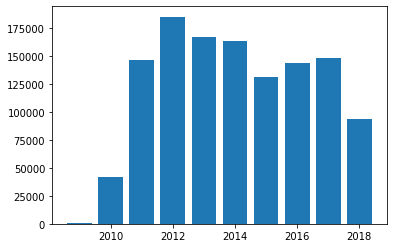

In [14]:
plt.bar(year_tips.index, year_tips)
plt.show()

In [15]:
# create compliments by year

In [16]:
df_comp_by_year = df.groupby('year')['compliment_count']

In [17]:
df_comp_by_year.value_counts()

year  compliment_count
2009  0                     950
      1                       1
2010  0                   41741
      1                      69
      2                       2
                          ...  
2017  6                       2
2018  0                   92909
      1                     889
      2                     121
      3                      22
Name: compliment_count, Length: 61, dtype: int64

In [18]:
comp_sum_by_year = df.groupby(['year'])['compliment_count'].sum()
comp_sum_by_year

year
2009       1
2010      73
2011     322
2012    3149
2013    4482
2014    3627
2015    2652
2016    2575
2017    2071
2018    1197
Name: compliment_count, dtype: int64

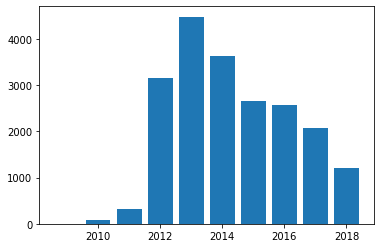

In [20]:
plt.bar(comp_sum_by_year.index, comp_sum_by_year);

In [21]:
df.head()

,text,date,compliment_count,year
0,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0,2014
1,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0,2013
2,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,2011
3,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0,2014
4,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0,2012


In [22]:
df['month'] = df.date.dt.month

In [23]:
df['hour'] = df.date.dt.hour

In [24]:
df.head()

,text,date,compliment_count,year,month,hour
0,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0,2014,3,3
1,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0,2013,5,6
2,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,2011,12,1
3,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0,2014,3,21
4,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0,2012,10,0


In [25]:
tips_year_month = df.groupby('year')['month'].value_counts()

In [26]:
tips_year_month.index

MultiIndex([(2009, 12),
            (2009,  9),
            (2009,  8),
            (2009, 10),
            (2009,  7),
            (2009, 11),
            (2009,  6),
            (2009,  5),
            (2009,  4),
            (2010, 12),
            ...
            (2018,  4),
            (2018,  5),
            (2018,  1),
            (2018,  7),
            (2018,  6),
            (2018,  2),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11)],
           names=['year', 'month'], length=116)

In [27]:
tips_year_month.loc[2009].sort_index()

month
4      58
5      68
6      69
7     103
8     141
9     143
10    105
11     98
12    166
Name: month, dtype: int64

In [28]:
for i in range(2009,2019):
    print(i)

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


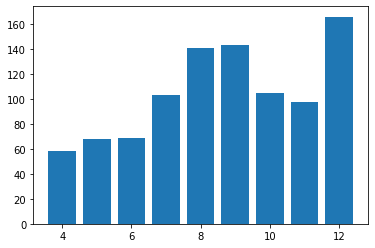

In [29]:
monthly_2009 = tips_year_month.loc[2009].sort_index()
plt.bar(monthly_2009.index, monthly_2009);

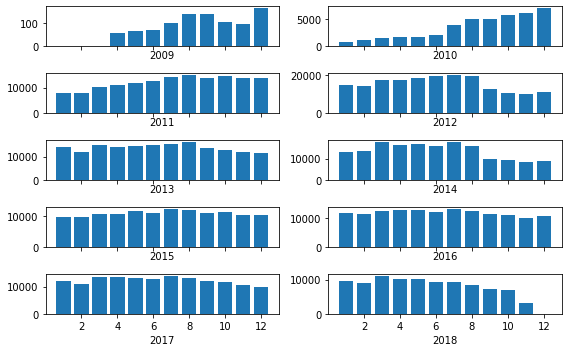

In [30]:
fig, axs = plt.subplots(5,2, figsize = (8,5), sharex=True, sharey=False, tight_layout=True)
for i, ax in enumerate(axs.flatten()):
    monthly = tips_year_month.loc[2009 + i].sort_index()
    ax.bar(monthly.index, monthly)
    ax.set_xlabel('{}'.format(2009+i))

In [31]:
tips_year_hour = df.groupby('year')['hour'].value_counts()

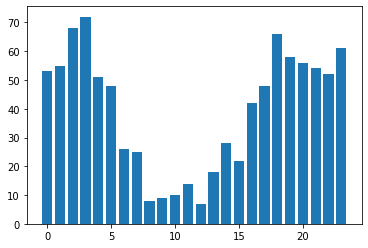

In [33]:
hourly_2009 = tips_year_hour.loc[2009].sort_index()
plt.bar(hourly_2009.index, hourly_2009);

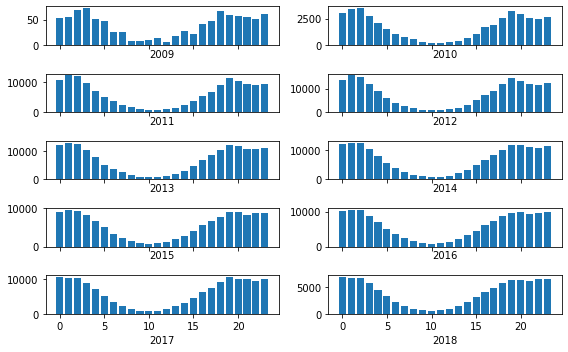

In [34]:
fig, axs = plt.subplots(5,2, figsize = (8,5), sharex=True, sharey=False, tight_layout=True)
for i, ax in enumerate(axs.flatten()):
    hourly = tips_year_hour.loc[2009+i].sort_index()
    ax.bar(hourly.index, hourly)
    ax.set_xlabel('{}'.format(2009+i))

In [35]:
df.head()

,text,date,compliment_count,year,month,hour
0,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0,2014,3,3
1,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0,2013,5,6
2,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0,2011,12,1
3,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0,2014,3,21
4,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0,2012,10,0


In [36]:
words = df['text'].str.lower()
word_counts = Counter(word_tokenize('\n'.join(words)))
word_counts.most_common(20)

[('.', 924140),
 ('!', 912415),
 ('the', 577991),
 ('and', 408073),
 (',', 340320),
 ('a', 279452),
 ('is', 249471),
 ('to', 247876),
 ('for', 199741),
 ('i', 197607),
 ('great', 191358),
 ('in', 153834),
 ('it', 150636),
 ('you', 142709),
 ('food', 141079),
 ('of', 138739),
 ('good', 128005),
 ('this', 116343),
 ('service', 113153),
 ('they', 111620)]

In [37]:
top_20_words = word_counts.most_common(20)

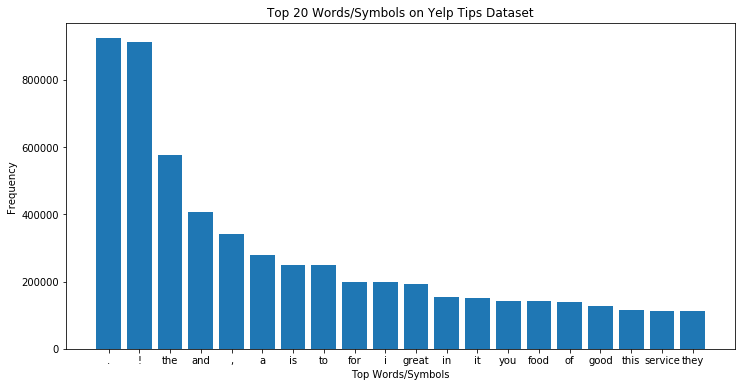

In [38]:
words, counts = zip(*top_20_words)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(words, counts, align='center')
ax.set_xlabel('Top Words/Symbols')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Words/Symbols on Yelp Tips Dataset');